In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
movies = pd.read_csv('movie_metadataFinal.csv')

In [4]:
# Printing the first 5 entries in the dataset 
# to see how the dataset looks like
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movies.shape, movies.columns

((5043, 28),
 Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'))

#  1. Description of dataset features

1. **Color** : Movie is black or coloured
2. **Director_name**: Name of the movie director
3. **num_critic_for_reviews** : No of critics for the movie
4. **duration**: Movie duration in minutes
5. **director_facebook_likes**: Number of likes for the Director on his Facebook Page
6. **actor_3_facebook_likes**: No of likes for the actor 3 on his/her facebook Page
7. **actor2_name**: name of the actor 2
8. **actor_1_facebook_likes**: No of likes for the actor 1 on his/her facebook Page
9. **gross**: Gross earnings of the movie in Dollars
10. **genres**: Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
11. **actor_1_name**: Name of the actor 1
12. **movie_title**: Title of the movie
13. **num_voted_users**: No of people who voted for the movie
14. **cast_total_facebook_likes**: Total facebook like for the movie
15. **actor_3_name**: Name of the actor 3
16. **facenumber_in_poster**: No of actors who featured in the movie poster
17. **plot_keywords**: Keywords describing the movie plots
18. **movie_imdb_link**: Link of the movie link
19. **num_user_for_reviews**: Number of users who gave a review
20. **language**: Language of the movie
21. **country**: Country where movie is produced
22. **content_rating**: Content rating of the movie
23. **budget**: Budget of the movie in Dollars
24. **title_year**: The year in which the movie is released
25. **actor_2_facebook_likes**: Facebook likes for the actor 2
26. **imdb_score**: IMDB score of the movie
27. **aspect_ratio** : Aspect ratio the movie was made in
28. **movie_facebook_likes**: Total no of facebook likes for the movie




## 2. Data cleaning

In [6]:
#No of the missing values in the dataset
movies.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# Imputing the dataframe
def replace_missing_values(data):
    # Get the column names by data types
    col_names = data.columns
    col_types = data.dtypes

    # Loop through each column and replace missing values
    for i in range(len(col_names)):
        col_name = col_names[i]
        col_type = col_types[i]
        
        if col_type == 'object':
            # For string columns, use bfill and ffill methods
            data[col_name] = data[col_name].fillna(method='bfill').fillna(method='ffill')
        else:
            # For numerical columns, replace missing values with the mean of the column
            data[col_name] = data[col_name].fillna(movies[col_name].mean())
    
    


In [8]:
# Imputing all the missing cells
replace_missing_values(movies)

In [9]:
# Get the count of missing values per row
missing_per_row = movies.isnull().sum(axis=1)

# Get the total number of rows with missing values
total_missing_rows = len(missing_per_row[missing_per_row > 0])

print(total_missing_rows)

0


In [10]:
#Checking to see if there are duplicates
movies.duplicated().sum()

42

In [11]:
#Removing the duplicate values in the datset
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()
movies.shape

(5001, 28)

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5001 non-null   object 
 1   director_name              5001 non-null   object 
 2   num_critic_for_reviews     5001 non-null   float64
 3   duration                   5001 non-null   float64
 4   director_facebook_likes    5001 non-null   float64
 5   actor_3_facebook_likes     5001 non-null   float64
 6   actor_2_name               5001 non-null   object 
 7   actor_1_facebook_likes     5001 non-null   float64
 8   gross                      5001 non-null   float64
 9   genres                     5001 non-null   object 
 10  actor_1_name               5001 non-null   object 
 11  movie_title                5001 non-null   object 
 12  num_voted_users            5001 non-null   int64  
 13  cast_total_facebook_likes  5001 non-null   int64

In [13]:
# Changing 'title year' to int
movies['title_year'] = movies['title_year'].apply(np.int64)


# 2. Feauture engineering

In [14]:
#Describing the categorical data
movies.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001
unique,2,2398,3032,914,2097,4916,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,The Fast and the Furious,Ben Mendelsohn,adolescence|girl next door|growing vegetables|...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4792,27,20,235,49,3,8,4,3,4674,3778,2243


In [15]:
# Droping'movie_title','movie_imdb_link' columns. 
#  This is becuase they are almost unique, so don't contribute match to our target variable
movies.drop(columns=['movie_title', 'movie_imdb_link','director_name','actor_1_name','actor_3_name','actor_2_name','plot_keywords','language','country'],axis=1, inplace=True)

In [16]:
# Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
feature_encoding = LabelEncoder()
categorical_features=['color', 
        'genres', 
         'content_rating',
       'title_year', 'aspect_ratio']
movies[categorical_features]=movies[categorical_features].apply(lambda x:feature_encoding.fit_transform(x))

In [17]:
#A sample of data after label encoding
movies.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,106,886204,4834,0.0,3054.000000,7,2.370000e+08,83,936.0,7.9,9,33000
1,1,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,100,471220,48350,0.0,1238.000000,7,3.000000e+08,81,5000.0,7.1,16,0
2,1,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,127,275868,11700,1.0,994.000000,7,2.450000e+08,89,393.0,6.8,16,85000
3,1,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,287,1144337,106759,0.0,2701.000000,7,2.500000e+08,86,23000.0,8.5,16,164000
4,1,140.194272,107.201074,131.0,645.009761,131.0,4.846841e+07,753,8,143,0.0,272.770808,7,3.975262e+07,76,12.0,7.1,14,0


# Correlation

<Axes: >

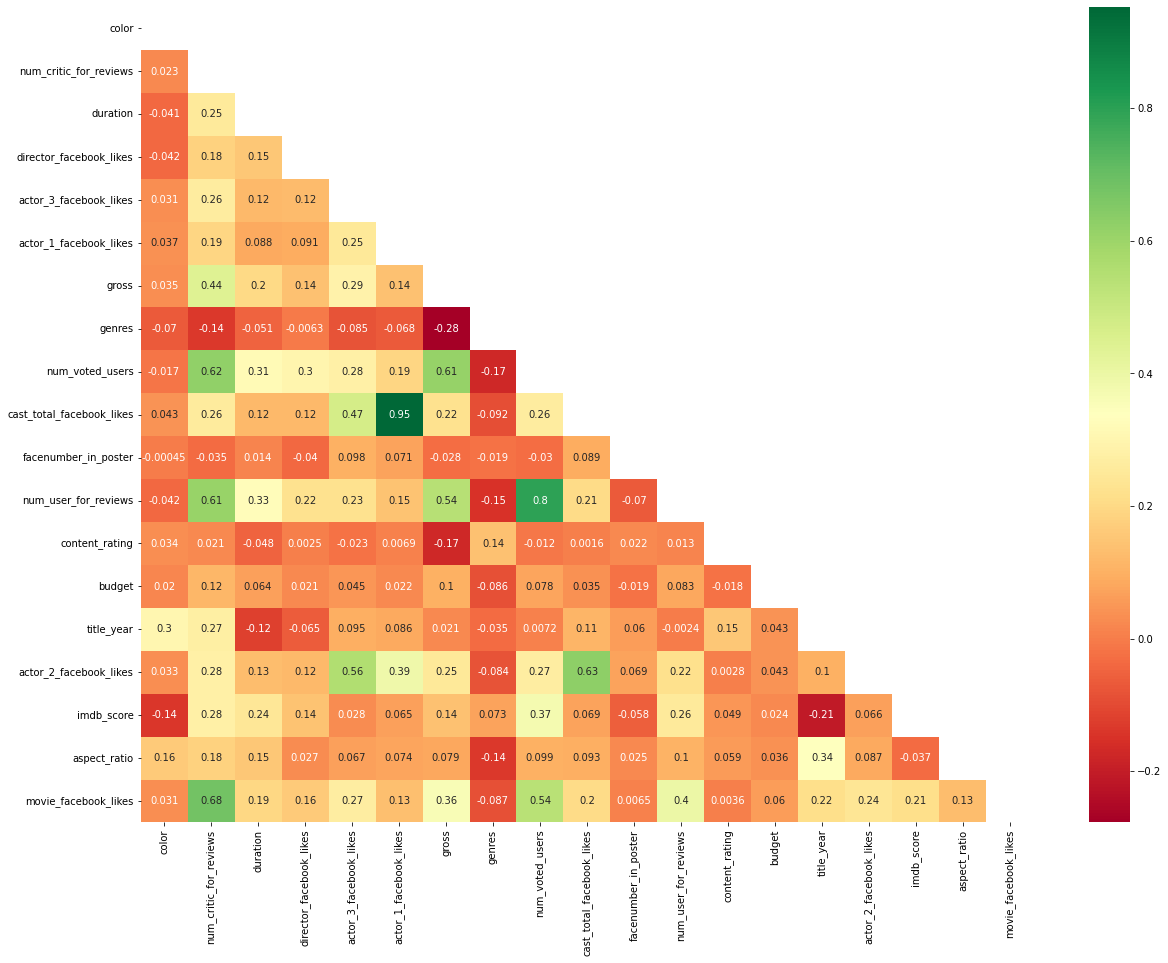

In [18]:
# Finding whether there is any relation between variables,
#  in other terms multicollinearity.

corr_matrix = movies.corr()
mask = np.zeros(corr_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,cmap='RdYlGn',annot=True,mask = mask)

In [19]:
# Removing few columns due to multicollinearity
movies.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'], axis=1,inplace=True)

# Categorizing IMDB_score(our target variable)

In [20]:
# Categorising the target variable 
bins = [ 1, 4.5, 8, 10]
labels = ['Flop Movie', 'Average Movie', 'Hit Movie']
movies['movie_performance'] = pd.cut(movies['imdb_score'], bins=bins, labels=labels)

In [21]:
# Removing the column "imdb_score" since we have "movie_performance"
movies.drop(columns=['imdb_score'],inplace=True)

# Model Building

In [22]:
datasetR = movies.copy() #lets keep our original dataset for reference. Here datasetR is for Regression model
datasetC = movies.copy() #Here datasetC is for classification model

In [23]:
datasetC.shape

(5001, 17)

In [24]:
#Dependent/Target Variable
y = datasetC.pop('movie_performance')

#Independent Variables
X = datasetC

y


0       Average Movie
1       Average Movie
2       Average Movie
3           Hit Movie
4       Average Movie
            ...      
5038       Flop Movie
5039       Flop Movie
5040    Average Movie
5041    Average Movie
5042    Average Movie
Name: movie_performance, Length: 5001, dtype: category
Categories (3, object): ['Flop Movie' < 'Average Movie' < 'Hit Movie']

#  Train Test Split

In [25]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)


(4000, 16)
(4000,)


# Scaling

In [26]:
#Scaling the dependent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns = X_train.columns, index = X_test.index)

In [27]:
X_train

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
4713,1.0,0.247706,0.000545,0.015609,0.000939,0.000104,0.779847,0.000048,0.000000,0.053720,0.294118,0.003254,0.966292,0.002708,0.636364,0.001799
808,1.0,0.455657,0.040545,0.004435,0.040625,0.005963,0.118291,0.022905,0.069767,0.072544,0.411765,0.004912,0.898876,0.002686,0.727273,0.000000
3697,1.0,0.269113,0.007409,0.028304,0.001563,0.114430,0.971522,0.112563,0.000000,0.170587,0.529412,0.000327,0.876404,0.004774,0.454545,0.000000
4222,1.0,0.269113,0.024318,0.026435,0.001563,0.000035,0.840088,0.000260,0.093023,0.001581,0.411765,0.003254,0.932584,0.004715,0.727273,0.001402
2990,1.0,0.287462,0.002773,0.026565,0.001202,0.002710,0.959474,0.017889,0.000000,0.062265,0.529412,0.000982,0.808989,0.005051,0.727273,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,1.0,0.299694,0.000000,0.020304,0.001380,0.063732,1.000000,0.000020,0.000000,0.000198,0.529412,0.000102,0.617978,0.004781,0.636364,0.000161
471,1.0,0.278287,0.019318,0.017261,0.017188,0.097737,0.052574,0.036336,0.046512,0.032220,0.411765,0.005730,0.797753,0.004693,0.727273,0.000000
3114,1.0,0.238532,0.000318,0.026739,0.001130,0.043371,0.662651,0.011502,0.000000,0.012848,0.529412,0.001637,0.842697,0.005153,0.454545,0.004930
3799,1.0,0.293578,0.001545,0.009870,0.001267,0.000021,0.986857,0.000717,0.000000,0.008500,0.529412,0.000409,0.865169,0.003810,0.727273,0.000201


# Feature selection

In [28]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
forest_model=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=forest_model, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [29]:
#Optimal number of features
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'facenumber_in_poster', 'num_user_for_reviews', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')


In [30]:
list(zip(X_train.columns,rfecv.support_,rfecv.ranking_))

[('color', False, 2),
 ('duration', True, 1),
 ('director_facebook_likes', True, 1),
 ('actor_3_facebook_likes', True, 1),
 ('actor_1_facebook_likes', True, 1),
 ('gross', True, 1),
 ('genres', True, 1),
 ('num_voted_users', True, 1),
 ('facenumber_in_poster', True, 1),
 ('num_user_for_reviews', True, 1),
 ('content_rating', True, 1),
 ('budget', True, 1),
 ('title_year', True, 1),
 ('actor_2_facebook_likes', True, 1),
 ('aspect_ratio', True, 1),
 ('movie_facebook_likes', True, 1)]

In [31]:
col_rfecv = X_train.columns[rfecv.support_]

In [32]:
#Creating an X_train and an X_test dataframe with rfecv variables
X_train_rfecv = X_train[col_rfecv]
X_test_rfecv =  X_test[col_rfecv]

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestClassifier(random_state = 0)
forest_model.fit(X_train_rfecv, y_train)
predicted_rating = forest_model.predict(X_test_rfecv)
print(predicted_rating[1:20])

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rating)))

['Average Movie' 'Average Movie' 'Average Movie' 'Hit Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie']
Model accuracy score: 0.8931


In [34]:
from sklearn import metrics
count_misclassified = (y_test != predicted_rating).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, predicted_rating)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, predicted_rating, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, predicted_rating, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, predicted_rating, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 107
Accuracy: 0.89
Precision: 0.81
Recall: 0.46
F1 score: 0.50


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
# View the classification report for test data and predictions
print(classification_report(y_test, predicted_rating))

               precision    recall  f1-score   support

Average Movie       0.89      1.00      0.94       875
   Flop Movie       0.67      0.03      0.06        67
    Hit Movie       0.87      0.34      0.49        59

     accuracy                           0.89      1001
    macro avg       0.81      0.46      0.50      1001
 weighted avg       0.88      0.89      0.86      1001



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 20,  criterion = 'entropy', random_state = 0)
forest_model.fit(X_train_rfecv, y_train)
improved_movie_prediction = forest_model.predict(X_test_rfecv)
print(improved_movie_prediction[1:20])

['Average Movie' 'Average Movie' 'Average Movie' 'Hit Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie' 'Average Movie'
 'Average Movie' 'Average Movie' 'Average Movie']


In [37]:
import joblib
joblib.dump(forest_model, 'rf_model.sav')

['rf_model.sav']

In [38]:
from sklearn.metrics import classification_report
improved_report = classification_report(y_test,improved_movie_prediction)
print(improved_report)

               precision    recall  f1-score   support

Average Movie       0.90      1.00      0.94       875
   Flop Movie       0.83      0.07      0.14        67
    Hit Movie       0.92      0.37      0.53        59

     accuracy                           0.90      1001
    macro avg       0.88      0.48      0.54      1001
 weighted avg       0.89      0.90      0.87      1001

